Political Influence on Stock Market Performance Analysis

In [2]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 9.2 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=89d2065c7863c4337ef930eafc4885b05158c2decf5f7704b20985a02e2a1525
  Stored in directory: c:\users\dijon\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab64

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [ ]:
!pip install --upgrade yfinance

In [2]:
# Option 1 for importing data
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

sp500 = yf.download('^GSPC', start = '1920-01-17', end='2025-07-31')

sp500.to_csv('sp500.csv')

sp500df = pd.read_csv('sp500.csv', index_col='Price', parse_dates=True)
sp500df.tail()


C:\Users\Delyan\AppData\Local\Temp\ipykernel_21660\2083838495.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start = '1920-01-17', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed
C:\Users\Delyan\AppData\Local\Temp\ipykernel_21660\2083838495.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500df = pd.read_csv('sp500.csv', index_col='Price', parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
2025-07-24,6363.35009765625,6381.31005859375,6360.56982421875,6368.60009765625,5282720000
2025-07-25,6388.64013671875,6395.81982421875,6368.52978515625,6370.009765625,4470720000
2025-07-28,6389.77001953125,6401.06982421875,6375.7900390625,6397.68994140625,4565620000
2025-07-29,6370.85986328125,6409.259765625,6363.919921875,6405.6201171875,5076120000
2025-07-30,6362.89990234375,6396.5400390625,6336.3798828125,6381.22998046875,5375070000


In [3]:
#Start after cleaning the csv file in excel
sp500df = pd.read_csv('sp500_clean.csv', parse_dates=True)
sp500df.head()


,Date,Close,High,Low,Open,Volume
0,12/30/1927,17.660000,17.660000,17.660000,17.660000,0
1,1/3/1928,17.760000,17.760000,17.760000,17.760000,0
2,1/4/1928,17.719999,17.719999,17.719999,17.719999,0
3,1/5/1928,17.549999,17.549999,17.549999,17.549999,0
4,1/6/1928,17.660000,17.660000,17.660000,17.660000,0


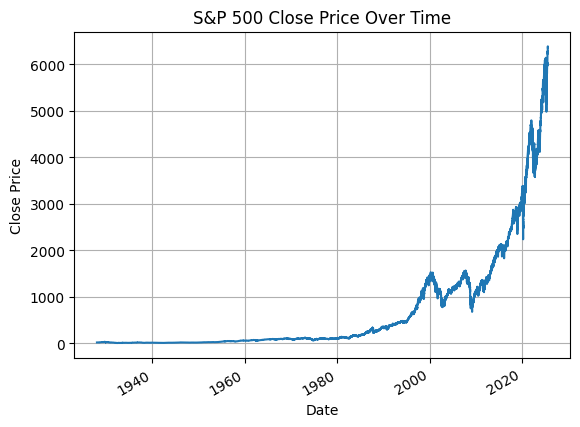

In [4]:
#A graph show
sp500df['Date'] = pd.to_datetime(sp500df['Date'])

# Set 'Date' as index
sp500df.set_index('Date', inplace=True)

# Convert 'Close' to numeric, in case it's still object type
sp500df['Close'] = pd.to_numeric(sp500df['Close'], errors='coerce')

sp500df['Close'].plot(title='S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

#sp500df['Close'].plot()

In [ ]:
#Option 2 for importing data
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime

start = datetime(2024, 1, 10)
end = datetime(2025, 6, 1)

# Fetch data using yfinance
data = yf.download('^GSPC', start=start, end=end)

# Add dummy variable: 1 if Close > Open = 1, else 0
data[('dummy_var')] = (data[('Close', '^GSPC')] > data[('Open', '^GSPC')]).astype(int)
data

In [34]:
data['Low']

Ticker,^GSPC
Date,
2024-01-10,4756.200195
2024-01-11,4739.580078
2024-01-12,4768.979980
2024-01-16,4747.120117
2024-01-17,4714.819824
...,...
2025-05-23,5767.410156
2025-05-27,5854.069824
2025-05-28,5881.879883


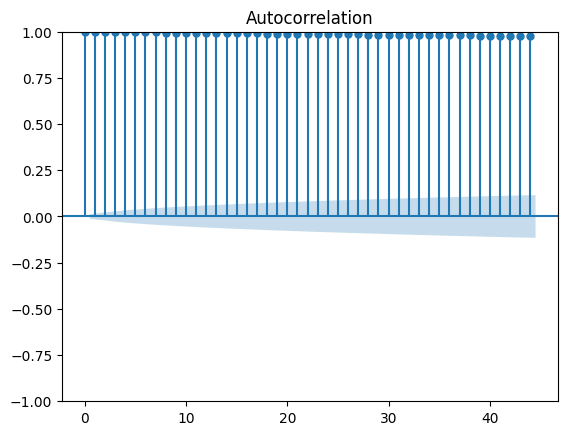

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
#**************************
# Plot ACF for 'Close' column
plot_acf(sp500df['Close'])
plt.show()


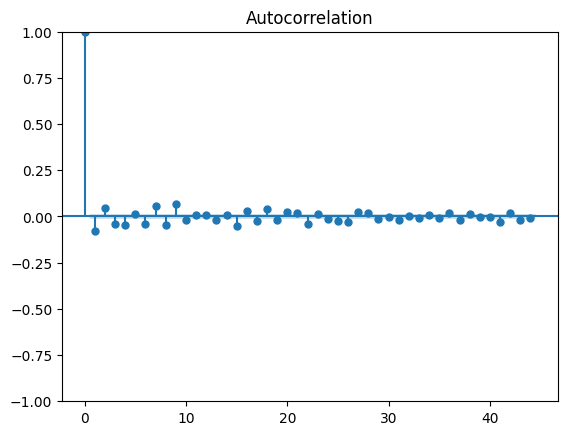

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

# First difference
diff_close = sp500df['Close'].diff().dropna()

# Plot ACF of differenced series
plot_acf(diff_close)
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prep your data
sp500df['Close'] = pd.to_numeric(sp500df['Close'], errors='coerce')
sp500df = sp500df.dropna(subset=['Close'])

# Ensure it's sorted
sp500df = sp500df.sort_index()

# Business-day frequency
y = sp500df['Close'].asfreq('B').ffill()


# Put on a regular Business-Day grid
y = sp500df.set_index('Date')['Close'].asfreq('B').ffill()

# Optional: log-transform for stability
y_log = np.log(y)

H = 30  # forecast horizon (business days)
train = y_log.iloc[:-H]
test  = y_log.iloc[-H:]

# --- ARIMA ---
arima = ARIMA(train, order=(5,1,0))  # tune as needed
arima_fit = arima.fit()
arima_res = arima_fit.get_forecast(steps=H)

fc_mean_log = arima_res.predicted_mean
fc_ci_log = arima_res.conf_int()

# Ensure DateTimeIndex for the forecast
if not isinstance(fc_mean_log.index, pd.DatetimeIndex):
    fc_idx = pd.date_range(y.index[-1] + BDay(1), periods=H, freq='B')
    fc_mean_log.index = fc_idx
    fc_ci_log.index = fc_idx

# Back-transform to price level
arima_fc = np.exp(fc_mean_log)
arima_lower = np.exp(fc_ci_log.iloc[:, 0])
arima_upper = np.exp(fc_ci_log.iloc[:, 1])

ax = y.iloc[-500:].plot(label='Actual', figsize=(10,5))
arima_fc.plot(ax=ax, label='ARIMA forecast')
ax.fill_between(arima_fc.index, arima_lower, arima_upper, alpha=0.2)
plt.title('S&P 500 – ARIMA Forecast'); plt.legend(); plt.show()

# --- Exponential Smoothing ---
es = ExponentialSmoothing(train, trend='add', damped_trend=True, seasonal=None)
es_fit = es.fit(optimized=True)
es_fc_log = es_fit.forecast(H)

if not isinstance(es_fc_log.index, pd.DatetimeIndex):
    es_fc_log.index = pd.date_range(y.index[-1] + BDay(1), periods=H, freq='B')

es_fc = np.exp(es_fc_log)

ax = y.iloc[-500:].plot(label='Actual', figsize=(10,5))
es_fc.plot(ax=ax, label='Holt (damped) forecast')
plt.title('S&P 500 – Exponential Smoothing Forecast'); plt.legend(); plt.show()


KeyError: "None of ['Date'] are in the columns"

In [19]:
# Drop NA and select correct columns
clean_data = data[[('Close', '^GSPC'), ('dummy_var', '')]].dropna()
#clean_data
corr = clean_data[('Close', '^GSPC')].corr(clean_data[('dummy_var', '')])
corr


np.float64(0.06120669127518778)

In [20]:
data.isnull().sum()

Price      Ticker
Close      ^GSPC     0
High       ^GSPC     0
Low        ^GSPC     0
Open       ^GSPC     0
Volume     ^GSPC     0
dummy_var            0
dtype: int64

<Axes: xlabel='Date'>

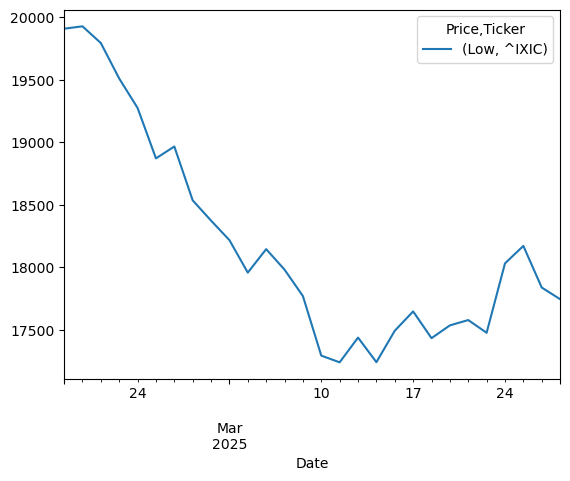

In [28]:
data[['Low']].plot()

In [ ]:
start = datetime(2025, 2, 17)
end = datetime(2025, 3, 11)

# Fetch data using yfinance
data = yf.download('AAPL', start=start, end=end)
data

In [27]:
start = datetime(2025, 2, 17)
end = datetime(2025, 3, 28)

# Fetch data using yfinance
data = yf.download('^IXIC', start=start, end=end)
data.head()

C:\Users\Dijon\AppData\Local\Temp\ipykernel_3604\1527995119.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^IXIC', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,
2025-02-18,20041.259766,20110.119141,19909.740234,20090.550781,8683170000
2025-02-19,20056.250000,20099.390625,19928.890625,19994.500000,8171530000
2025-02-20,19962.359375,20041.150391,19795.019531,20029.189453,7329270000
2025-02-21,19524.009766,20016.660156,19510.910156,20006.689453,8461020000
2025-02-24,19286.929688,19644.230469,19275.460938,19590.849609,7414760000


In [ ]:
#self._set_session(session or requests.Session(impersonate="chrome"))

In [23]:
  #from curl_cffi import requests
  #session = requests.Session(impersonate="chrome")
  #ticker = yf.Ticker('^IXIC', session=session)

In [ ]:
Първо емпиричната част
с 0 и 1 - регресионен модел(като фактор), може да се добави и обема като фактор

1.Информация за индексите /Сваляне на данните
Уточнаване на събития
2. Информация за анализите или политически събития; почистване. спад, скок
    Подготовка на данните, графики, описания на динамиката; процент на прираст
    Трениране на модел
3. Метода с който правя нещо, 
4. поне 9 месеца
